In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (roc_curve, auc, roc_auc_score,
                             confusion_matrix)
import matplotlib.pyplot as plt
from numpy import where
from sklearn import preprocessing
from collections import Counter
import itertools
import pickle
from sklearn.utils import resample
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours, RandomUnderSampler, ClusterCentroids
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

In [9]:
# Reading CSV File
df = pd.read_csv('given_dataset.csv')
df.drop('id', axis = 1, inplace = True)
df.dropna()
df.drop_duplicates()
df.head()

,A,B,C,D,E,F,G,T
0,8.341749e+07,2,124,4,0.144868,3.091977e-01,22,1
1,1.379494e+08,2,5,34,0.117274,9.492332e-03,0,1
2,1.293132e+08,2,324,18,0.006898,6.352157e-07,2,1
3,1.028544e+08,2,202,4,0.000000,8.980000e-02,0,1
4,2.784674e+09,2,281,56,0.000000,3.288574e-04,0,1


In [10]:
df['T'].value_counts()
# Just 1.44% values are 0

1    2012677
0      29010
Name: T, dtype: int64

In [29]:
X = df[['A', 'B', 'C', 'D', 'E', 'F', 'G']]
y = df['T']

In [5]:
# Model 1 (Hope 3)
model = XGBClassifier(max_depth = 10, scale_pos_weight = 0.0144) 
model.fit(X, y)

# Saving model
filename = 'model_1.sav'
pickle.dump(model, open(filename, 'wb'))

In [6]:
# Model 2 (Hope 4)
X_maj = df[df['T'] == 1]
X_min = df[df['T'] == 0]
X_maj_rus = resample(X_maj, replace = False, n_samples = 2*len(X_min), random_state = 111)
X_rus = pd.concat([X_maj_rus, X_min])
X_train = X_rus.drop(['T'], axis = 1)
y_train = X_rus['T']
model = XGBClassifier(max_depth = 10, scale_pos_weight = 0.5) 
model.fit(X_train, y_train)

# Saving model
filename = 'model_2.sav'
pickle.dump(model, open(filename, 'wb'))

In [7]:
# Model 3 (Hope 5)
under = RandomUnderSampler(sampling_strategy = 0.4)
X, y = under.fit_resample(X, y)

smote = SMOTE(sampling_strategy=0.7, k_neighbors=7)
X_train, y_train = smote.fit_resample(X, y)

param = {'max_depth': 10, 'objective': 'binary:logistic', 'scale_pos_weight' : 0.7}
model = XGBClassifier(**param)
model.fit(X_train, y_train)

# Saving model
filename = 'model_3.sav'
pickle.dump(model, open(filename, 'wb'))

In [16]:
# Skewness of data before pre-processing
df['T'].value_counts()

1    2012677
0      29010
Name: T, dtype: int64

In [17]:
# Skewness of data after pre-processing for Model - 2
X_maj = df[df['T'] == 1]
X_min = df[df['T'] == 0]
X_maj_rus = resample(X_maj, replace = False, n_samples = 2*len(X_min), random_state = 111)
X_rus = pd.concat([X_maj_rus, X_min])
X_train = X_rus.drop(['T'], axis = 1)
y_train = X_rus['T']
y_train.value_counts()

1    58020
0    29010
Name: T, dtype: int64

In [19]:
# Skewness of data after pre-processing for Model - 3
under = RandomUnderSampler(sampling_strategy = 0.4)
X, y = under.fit_resample(X, y)

smote = SMOTE(sampling_strategy=0.7, k_neighbors=7)
X_train, y_train = smote.fit_resample(X, y)
y_train.value_counts()

1    72525
0    50767
Name: T, dtype: int64

In [20]:
def show_cm(y_true, y_pred, class_names=None, model_name=None):
#     Show confusion matrix
 
 cf = confusion_matrix(y_true, y_pred)
 plt.imshow(cf, cmap=plt.cm.Blues)
 if model_name:
   plt.title('Confusion Matrix: {}'.format(model_name))
 else:
   plt.title('Confusion Matrix')
   plt.ylabel('True Label')
   plt.xlabel('Predicted Label')
 if class_names:
   tick_marks = np.arange(len(class_names))
   plt.xticks(tick_marks, class_names)
   plt.yticks(tick_marks, class_names)
 else:
   class_names = set(y_true)
   tick_marks = np.arange(len(class_names))
   plt.xticks(tick_marks, class_names)
   plt.yticks(tick_marks, class_names)
 thresh = cf.max() / 2.0
 for i, j in itertools.product(range(cf.shape[0]),
                               range(cf.shape[1])):
   plt.text(j, i, cf[i, j],
            horizontalalignment='center',
            color='white' if cf[i, j] > thresh else 'black',
            )
 plt.colorbar()

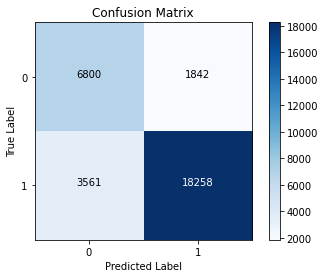

In [31]:
under = RandomUnderSampler(sampling_strategy = 0.4)
X, y = under.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1111)
smote = SMOTE(sampling_strategy=0.5, k_neighbors=7)
X_train, y_train = smote.fit_resample(X, y)

param = {'scale_pos_weight' : 0.5}
model = XGBClassifier(**param)
model.fit(X_train, y_train)
ans = model.predict(X_test)

show_cm(y_test, ans)

In [ ]:
# Checking and storing
df_test = pd.read_csv('to_predict.csv')
def get_result(df_test):
    df_test.drop_duplicates()
    df_test.dropna()
    op = df_test[['id']]
    df_test.drop('id', axis = 1, inplace = True)
    X = df_test[['A', 'B', 'C', 'D', 'E', 'F', 'G']]
    filename = 'model_1.sav'
    model = pickle.load(open(filename, 'rb'))
    ans = model.predict(X)
    op.insert(1, 'T', ans, True)
    filename = 'submission.csv'
    op.to_csv(filename, index = False)
    return op